<a href="https://colab.research.google.com/github/rkrissada/100DayOfMLCode/blob/master/day_050_regression_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Duncan's Prestige Dataset

In [0]:
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data

In [4]:
prestige.head(100)

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90
minister,prof,21,84,87
professor,prof,64,93,93
dentist,prof,80,100,90
reporter,wc,67,87,52
engineer,prof,72,86,88


In [0]:
prestige_model = ols('prestige ~ income + education', data = prestige).fit()

In [6]:
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           8.65e-17
Time:                        03:39:45   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

#### Influence plots

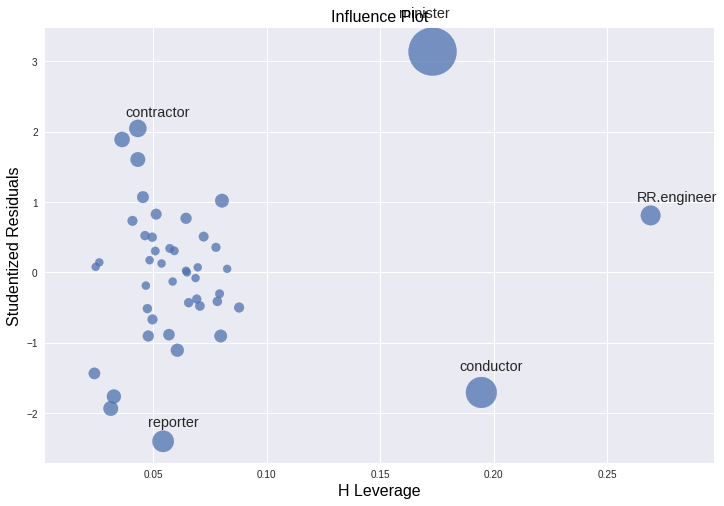

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(prestige_model, ax=ax, criterion='cooks')

Both contractor and reporter have low leverage but a large residual. PR.engineer has large leverage and small residual. Conductor and minister have high leverage and large residual, and therefore, large influence.

#### Partial Regression Plots

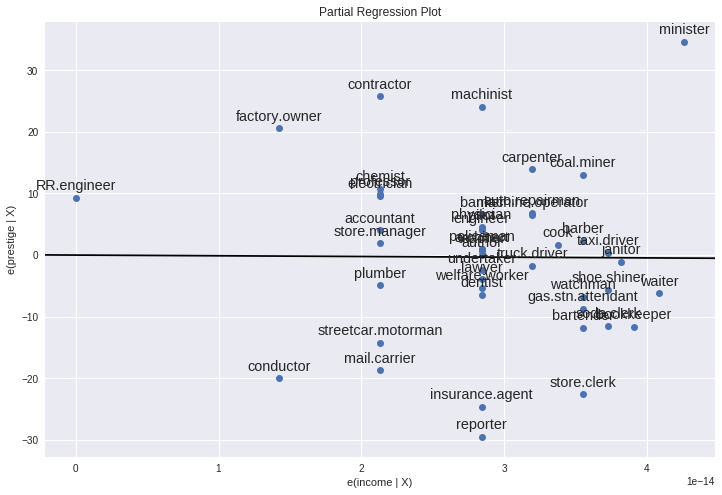

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress('prestige', 'income', ['income', 'education'], data = prestige, ax=ax)

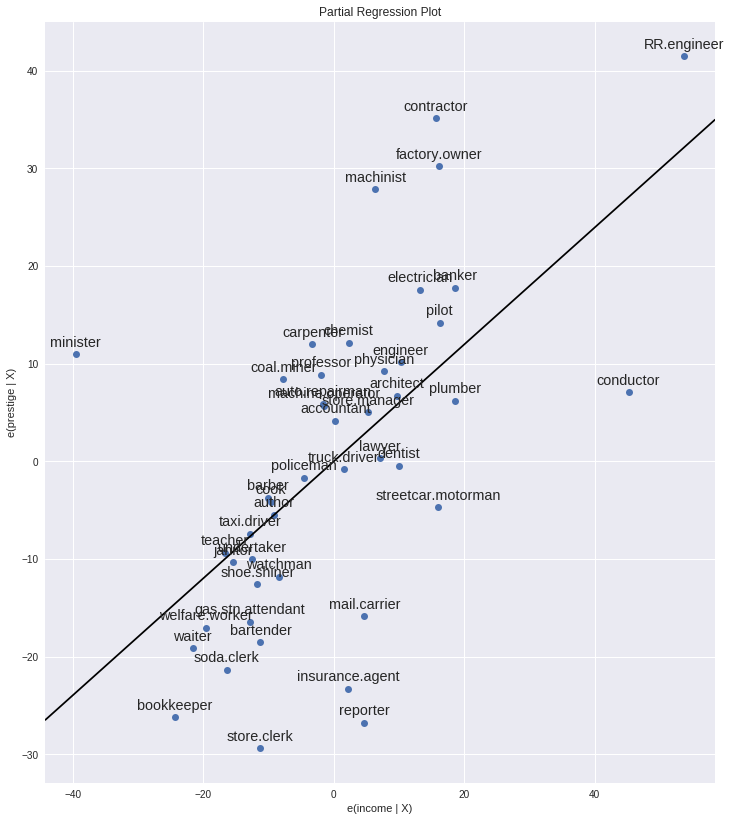

In [9]:
fig, ax = plt.subplots(figsize=(12,14))
fig = sm.graphics.plot_partregress('prestige', 'income', ['education'], data = prestige, ax = ax)

As you can see the partial regression plot confirms the influence of conductor, minister, and RR.engineer on the partial relationship between income and prestige. The cases greatly decrease the effect of income on prestige. Dropping these cases confirms this.

In [10]:
subset = ~ prestige.index.isin(['conductor', 'PR.engineer', 'minister'])
prestige_model2 = ols('prestige ~ income + education', data = prestige, subset = subset).fit()
print(prestige_model2.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     141.3
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           7.42e-19
Time:                        03:43:27   Log-Likelihood:                -164.16
No. Observations:                  43   AIC:                             334.3
Df Residuals:                      40   BIC:                             339.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4090      3.653     -1.755      0.0

For a quick check of all the regressors, you can use plot_partregress_grid. These plots will not label the points, but you can use them to identify problems and then use plot_partregress to get more information.

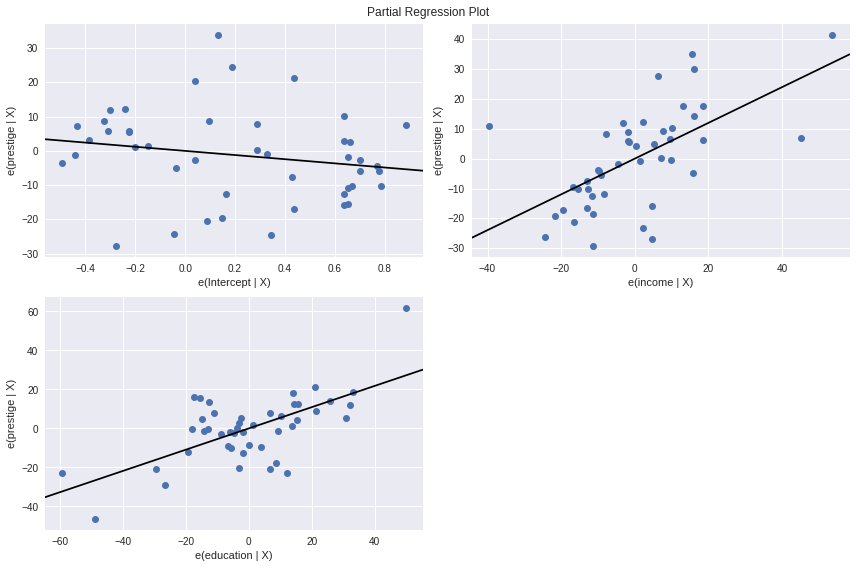

In [11]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(prestige_model, fig=fig)

#### Component-Component plus Residual (CCPR) Plots

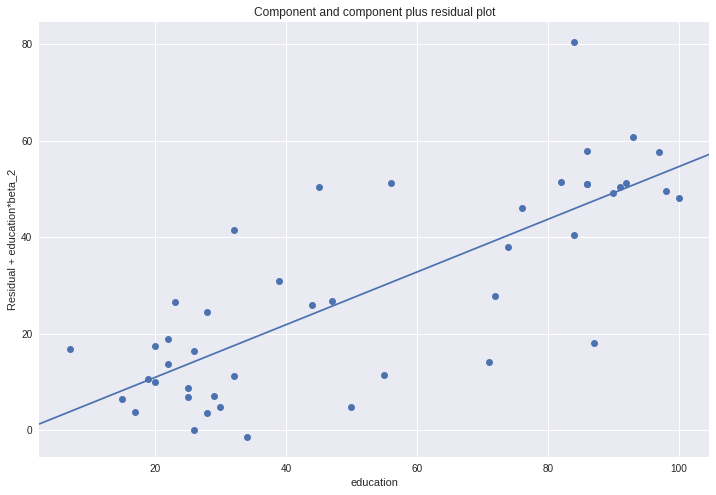

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_ccpr(prestige_model, 'education', ax = ax)

As you can see the relationship between the variation in prestige explained by education conditional on income seems to be linear, though you can see there are some observations that are exerting considerable influence on the relationship. We can quickly look at more than one variable.

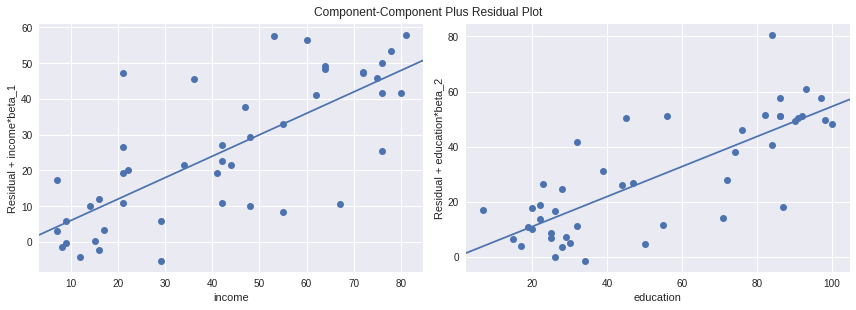

In [13]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr_grid(prestige_model, fig=fig)

#### Regression plot

The plot_regress_exog function is a convenience function that gives a 2x2 plot containing the dependent variable and fitted values with confidence intervals vs. the independent variable chosen, the residuals of the model vs. the chosen independent variable, a partial regression plot, and a CCPR plot. This function can be used for quickly checking modeling assumptions with respect to a single regressor.

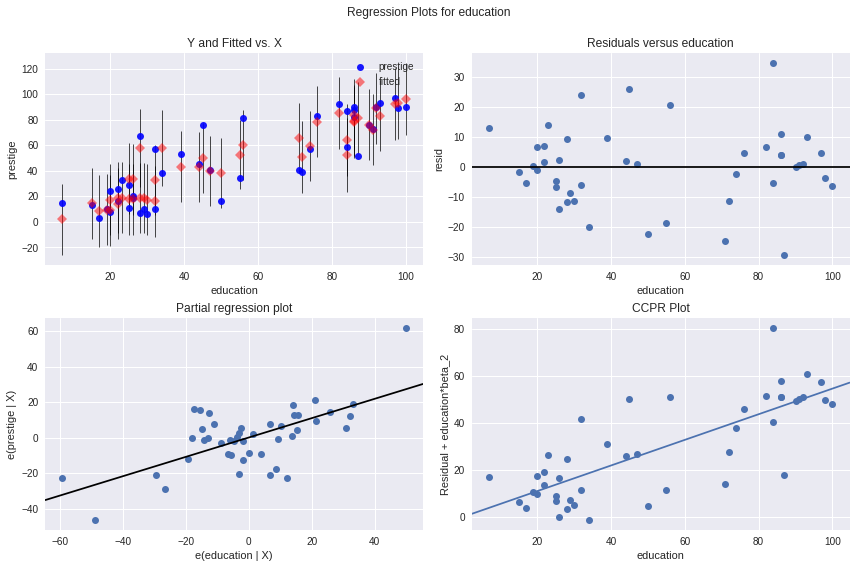

In [14]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(prestige_model, 'education', fig=fig)

#### Fit plot

The plot_fit function plots the fitted values versus a chosen independent variable. It includes prediction confidence intervals and optionally plots the true dependent variable.

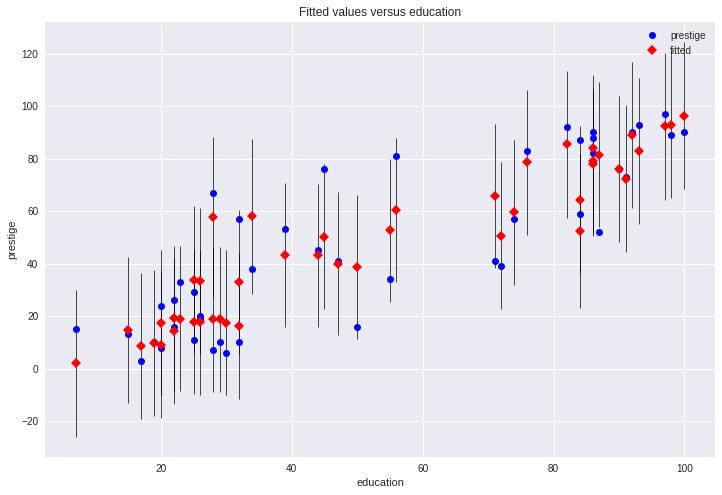

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_fit(prestige_model, 'education', ax=ax)